# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.shape

(200, 5)

In [9]:
#remove the unnamed: 0 columns  as it is not required for the prediction

In [10]:
df.drop('Unnamed: 0', axis= 1 , inplace = True) 

# Visualization

In [11]:
corr_matrix=df.corr()

<AxesSubplot:>

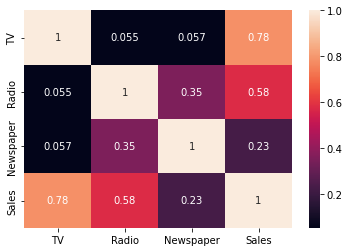

In [12]:
sns.heatmap(corr_matrix,annot = True)

In [13]:
# we can see that the sales values are correlated the highest with TV values

# Splitting the dataset into the Training set and Test set

In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [16]:
x_train.shape

(150, 3)

In [17]:
x_test.shape

(50, 3)

# Training using Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = regressor.predict(x_test)

# Accuracy and Result

In [20]:
from sklearn.metrics import r2_score
acc = (r2_score(y_test,y_pred))*100
print("The accuracy of the model is",acc)

The accuracy of the model is 89.35163320163659


In [21]:
print("Score of training data: ", regressor.score(x_train, y_train))
print("Score of test data: ", regressor.score(x_train, y_train))

Score of training data:  0.8966445527601499
Score of test data:  0.8966445527601499


# Evaluation of the model

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [23]:
print("The root mean square error is",rmse)
print("The mean square error is",mse)
print("The mean absolute error is",mae)

The root mean square error is 1.6970632663793623
The mean square error is 2.880023730094191
The mean absolute error is 1.4023124989385067
